# Linear Regression using Statistics

* Linear regression assumes a linear or straight-line relationship between the input variables (X) and the single output variable (y). More specifically, that output (y) can be calculated from a linear combination of the input variables (X). When there is a single input variable, the method is referred to as a simple linear regression.

* The line for a simple linear regression model can be written as:
        y = b0 + b1.x

* Where b0 and b1 are the coefficients, we must estimate from the training data. Once the coefficients are known, we can use this equation to estimate output values for y given new input examples of x. It requires that you calculate statistical properties from the data such as **mean, variance and covariance**.

* Briefly, we can estimate the coefficients as follows:

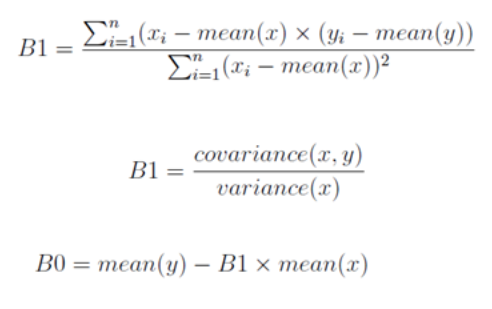

* **Calculate Mean and Variance:**

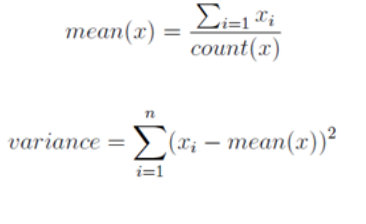

In [1]:
# Calculate the mean value of a list of numbers
def mean(values):
    return sum(values) / float(len(values))

In [2]:
# Calculate the variance of a list of numbers
def variance(values, mean):
    return sum([(x-mean)**2 for x in values])

* **Calculate Covariance:**

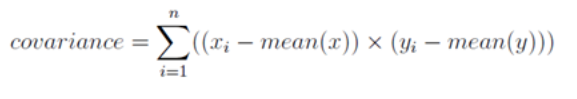

In [3]:
# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar

In [4]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [5]:
column_names = ['column1', 'target']
df = pd.read_csv("Data/insurance.csv", names=column_names)

In [6]:
df.head()

,column1,target
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   column1  63 non-null     int64  
 1   target   63 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [8]:
# Calculate coefficients
def coefficients(X, y):
    x_mean, y_mean = mean(X), mean(y)
    b1 = covariance(X.values, x_mean, y.values, y_mean) / variance(X.values, x_mean)
    b0 = y_mean - b1 * x_mean
    return [b0, b1]

In [9]:
# Simple linear regression algorithm
def simple_linear_regression(X_train,y_train, X_test):
    predictions = list()
    b0, b1 = coefficients(X_train, y_train)
    for row in X_test.values:
        yhat = b0 + b1 * row
        predictions.append(yhat)
    return predictions

In [10]:
X = df["column1"]
y = df["target"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
predictions = simple_linear_regression(X_train,y_train, X_test)

In [13]:
np.sqrt(mean_squared_error(y_test,predictions))

35.46606319676417

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()

In [16]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [17]:
model.fit(X_train, y_train)

LinearRegression()

In [18]:
y_hat = model.predict(X_test)

In [19]:
np.sqrt(mean_squared_error(y_test,y_hat))

35.46606319676416